### Problem definition

#### Problem Statement : Credit card fraud transaction detection

The main goal is to detect the fraudulent credit card transactions using k-fold cross validation techiques for following classification tree machine learning models.
1. Decision Tree,
2. Random Forest 
3. Bagging


### Creation of base dataset

In [242]:
import pandas as pd
import numpy as np
import seaborn as sns
base_dataset=pd.read_csv("C:\\Sridhar\\AI_ML\\Algorithms\\datasets\\CreditCard\\creditcard.csv")
df=base_dataset

In [243]:
base_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### Pre Processing

In [244]:
base_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [245]:
base_dataset.shape

(284807, 31)

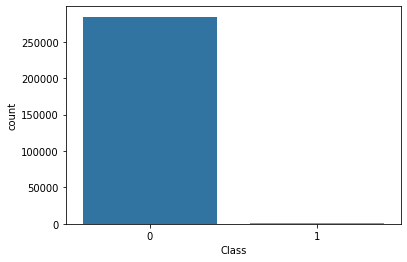

In [246]:
sns.countplot(base_dataset['Class'])

From the above plot we can clearly see dataset is imbalanced.
So we need to use classificaiton alorithms like accuracy score

#### Memory management 

In [247]:
""" iterate through all the columns of a dataframe and modify the data type
    to reduce memory usage.        
"""
start_mem = base_dataset.memory_usage().sum() / 1024**2
print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))

for col in base_dataset.describe().columns:
    col_type = base_dataset[col].dtype

    if col_type != object:
        c_min = base_dataset[col].min()
        c_max = base_dataset[col].max()
        if str(col_type)[:3] == 'int':
            if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                base_dataset[col] = base_dataset[col].astype(np.int8)
            elif c_min > base_dataset.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                base_dataset[col] = base_dataset[col].astype(np.int16)
            elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                base_dataset[col] = base_dataset[col].astype(np.int32)
            elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                base_dataset[col] = base_dataset[col].astype(np.int64)  
        else:
            if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                base_dataset[col] = base_dataset[col].astype(np.float16)
            elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                base_dataset[col] = base_dataset[col].astype(np.float32)
            else:
                base_dataset[col] = base_dataset[col].astype(np.float64)
    else:
        base_dataset[col] = base_dataset[col].astype('category')

end_mem = base_dataset.memory_usage().sum() / 1024**2
print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))    

Memory usage of dataframe is 67.36 MB
Memory usage after optimization is: 17.11 MB
Decreased by 74.6%


In [248]:
base_dataset.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [249]:
### We can see from the above results that there are no blank or null values in all the column values 
## then null value treatement is not required 
## in this case

#### Outlier treatment

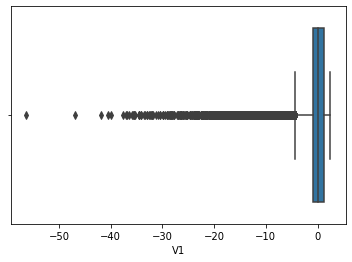

In [250]:
sns.boxplot(x=base_dataset['V1'])

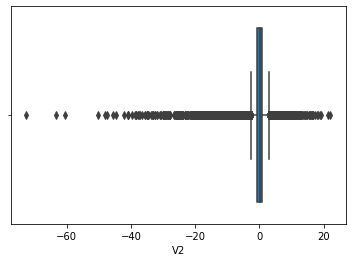

In [251]:
sns.boxplot(x=base_dataset['V2'])

We have plotted V1 and V2 columns just to see if the outliers exists in the columns values. 
We can clearly see the outliers in the columns in the boxplot. 
Since all the columns are numical continouse columns, so we need to do the outlier treatement in the above plots.

In [252]:
def outliers_transform(base_dataset):
    for i in base_dataset.var().sort_values(ascending=False).index[0:10]:
        x=np.array(base_dataset[i])
        qr1=np.quantile(x,0.25)
        qr3=np.quantile(x,0.75)
        iqr=qr3-qr1
        utv=qr3+(1.5*(iqr))
        ltv=qr1-(1.5*(iqr))
        y=[]
        #"""Based on clients input(ltv,utv) run the below code """
        for p in x:
            if p <ltv or p>utv:
                y.append(np.median(x))
            else:
                y.append(p)
        base_dataset[i]=y

In [253]:
outliers_transform(base_dataset)

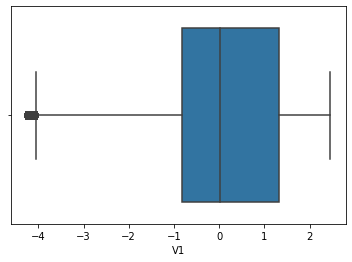

In [255]:
sns.boxplot(x=base_dataset['V1'])

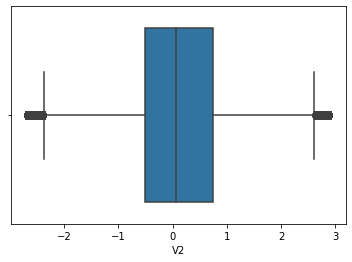

In [256]:
sns.boxplot(x=base_dataset['V2'])

The outliers have been removed from all the columns. Now the dataset is free from outliers

In [257]:
base_dataset.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

#### Normalising the amount column. The amount column is not in line with the other columns

In [258]:
from sklearn.preprocessing import StandardScaler
sd = StandardScaler()
sd.fit_transform(pd.DataFrame(base_dataset['Amount']))
z=sd.transform(pd.DataFrame(base_dataset['Amount']))
base_dataset['Amount']=z

In [259]:
base_dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359375,-0.072754,2.537109,1.377930,-0.338379,0.462402,0.239624,0.098694,0.363770,...,-0.018311,0.277832,-0.110474,0.066956,0.128540,-0.189087,0.133545,-0.021057,2.905947,0
1,0.0,1.191406,0.266113,0.166504,0.448242,0.060028,-0.082336,-0.078796,0.085083,-0.255371,...,-0.225830,-0.638672,0.101318,-0.339844,0.167114,0.125854,-0.008980,0.014725,-0.771747,0
2,1.0,-1.358398,-1.339844,1.773438,0.379883,-0.503418,1.800781,0.791504,0.247681,-1.514648,...,0.248047,0.771484,0.909180,-0.689453,-0.327637,-0.139038,-0.055359,-0.059753,-0.288418,0
3,1.0,-0.966309,-0.185181,1.792969,-0.863281,-0.010307,1.247070,0.237549,0.377441,-1.386719,...,-0.108276,0.005272,-0.190308,-1.175781,0.647461,-0.221924,0.062744,0.061462,2.252057,0
4,2.0,-1.158203,0.877930,1.548828,0.403076,-0.407227,0.095947,0.592773,-0.270508,0.817871,...,-0.009430,0.798340,-0.137451,0.141235,-0.206055,0.502441,0.219482,0.215210,0.912989,0


Dropping Time column which is not required for analysis

In [260]:
base_dataset.drop('Time',axis=1,inplace=True)

#### Univariate analysis (EDA)

In [261]:
base_dataset.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359375,-0.072754,2.537109,1.377930,-0.338379,0.462402,0.239624,0.098694,0.363770,0.090820,...,-0.018311,0.277832,-0.110474,0.066956,0.128540,-0.189087,0.133545,-0.021057,2.905947,0
1,1.191406,0.266113,0.166504,0.448242,0.060028,-0.082336,-0.078796,0.085083,-0.255371,-0.166992,...,-0.225830,-0.638672,0.101318,-0.339844,0.167114,0.125854,-0.008980,0.014725,-0.771747,0
2,-1.358398,-1.339844,1.773438,0.379883,-0.503418,1.800781,0.791504,0.247681,-1.514648,0.207642,...,0.248047,0.771484,0.909180,-0.689453,-0.327637,-0.139038,-0.055359,-0.059753,-0.288418,0
3,-0.966309,-0.185181,1.792969,-0.863281,-0.010307,1.247070,0.237549,0.377441,-1.386719,-0.054962,...,-0.108276,0.005272,-0.190308,-1.175781,0.647461,-0.221924,0.062744,0.061462,2.252057,0
4,-1.158203,0.877930,1.548828,0.403076,-0.407227,0.095947,0.592773,-0.270508,0.817871,0.752930,...,-0.009430,0.798340,-0.137451,0.141235,-0.206055,0.502441,0.219482,0.215210,0.912989,0


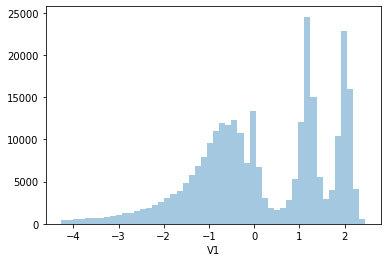

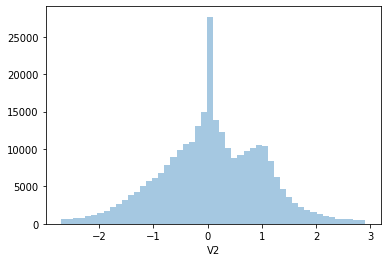

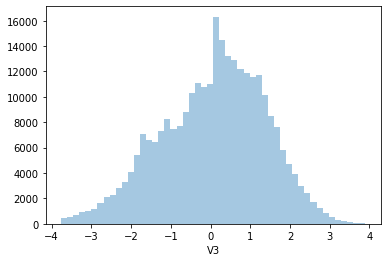

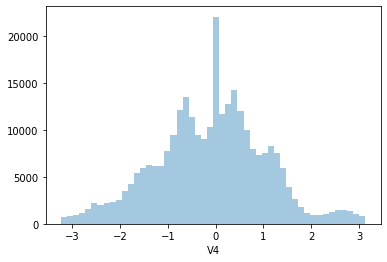

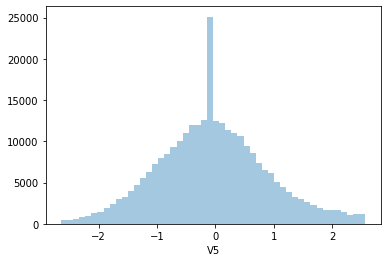

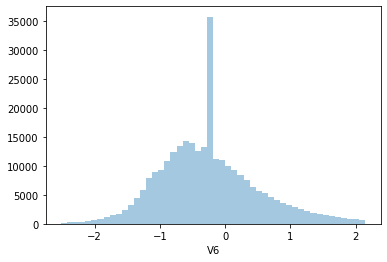

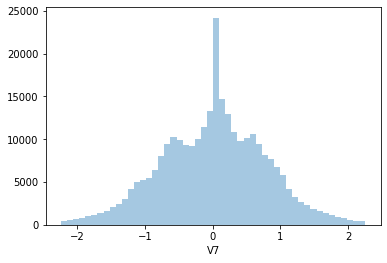

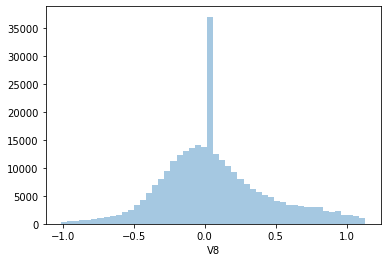

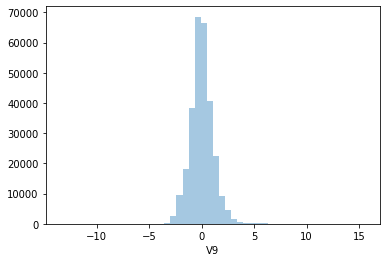

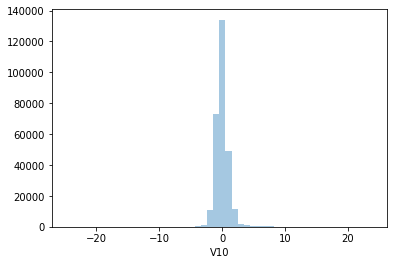

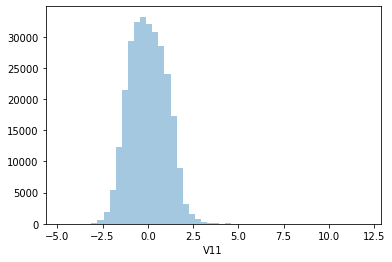

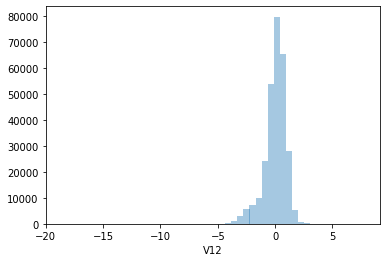

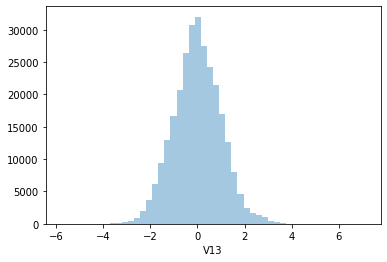

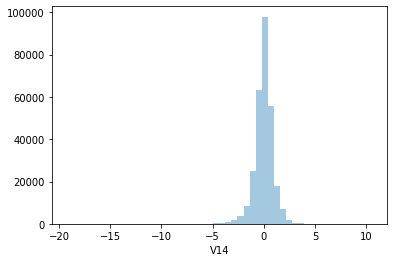

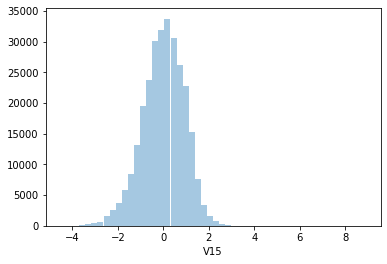

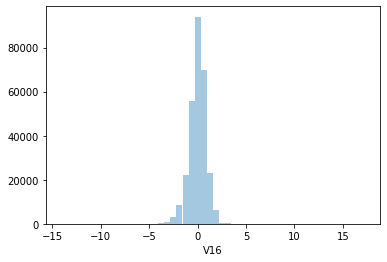

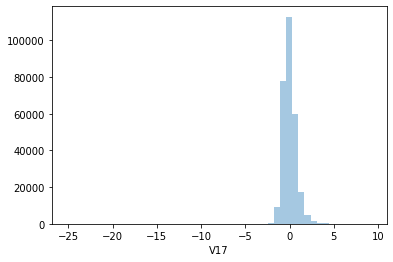

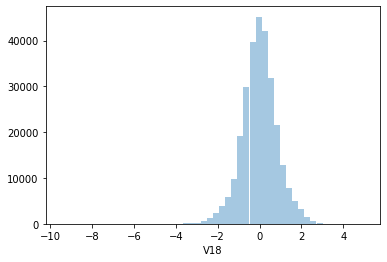

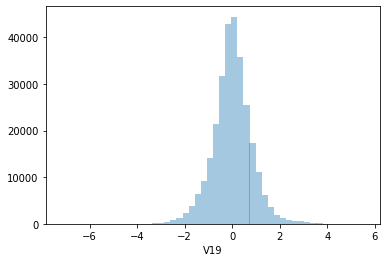

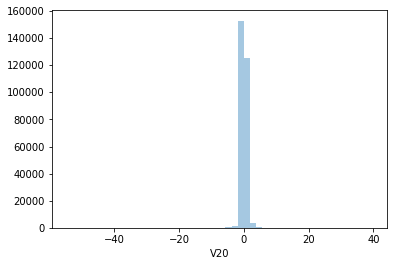

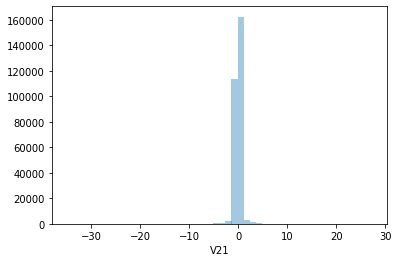

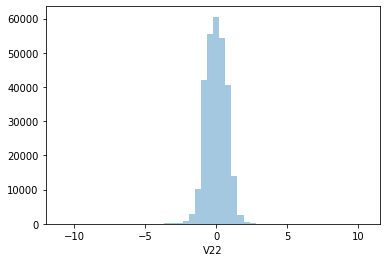

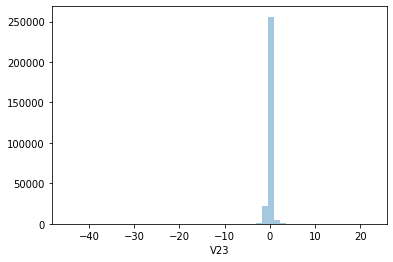

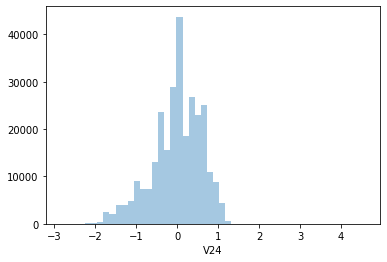

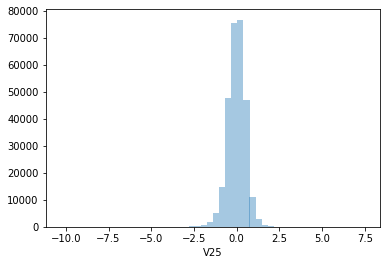

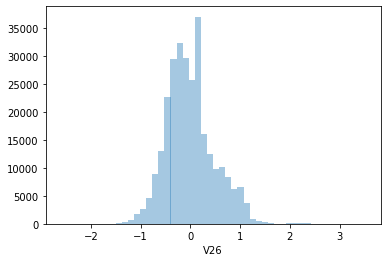

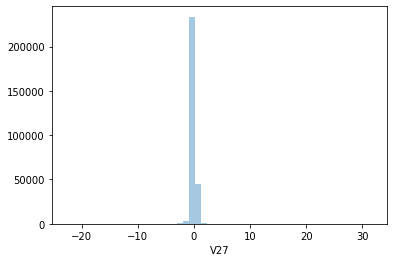

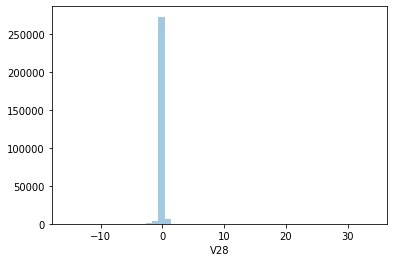

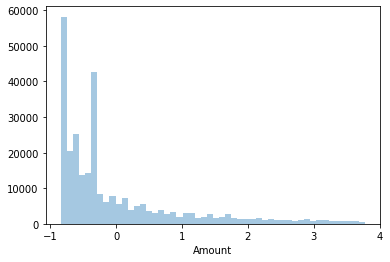

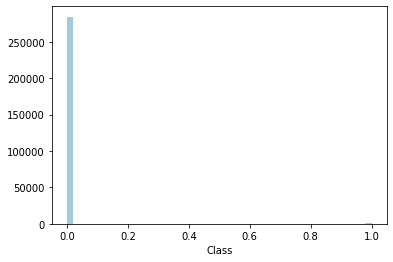

In [262]:
import matplotlib.pyplot as plt
for i in base_dataset.var().index:
    sns.distplot(base_dataset[i],kde=False)
    plt.show()

####  Bivariate analysis (EDA)

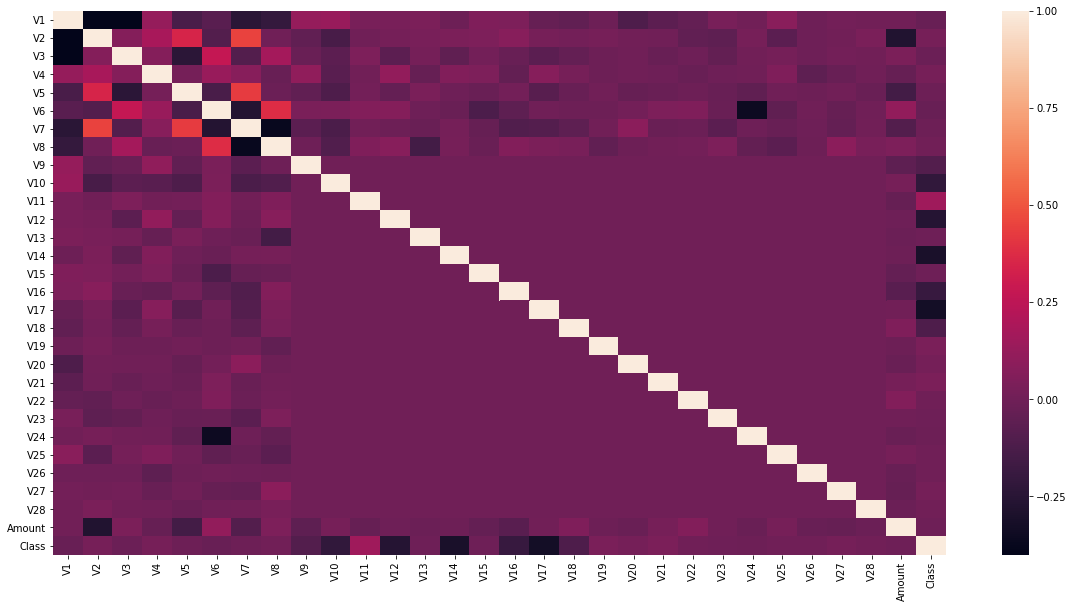

In [263]:
plt.figure(figsize=(20,10))
sns.heatmap(base_dataset.corr())

### Model Building

#### Supervised

Running classification algorithms such as DecisionTreeClassifier, RandomForestClassifier, BaggingClassifier to check the accuracy score for each alogorithm. The algorithms are executed with the K-Fold cross validations.

In [264]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [265]:
y = base_dataset['Class']
x = base_dataset.drop('Class',axis=1)

In [266]:
y.head(10)

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
9    0
Name: Class, dtype: int8

In [267]:
x.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
0,-1.359375,-0.072754,2.537109,1.377930,-0.338379,0.462402,0.239624,0.098694,0.363770,0.090820,...,0.251465,-0.018311,0.277832,-0.110474,0.066956,0.128540,-0.189087,0.133545,-0.021057,2.905947
1,1.191406,0.266113,0.166504,0.448242,0.060028,-0.082336,-0.078796,0.085083,-0.255371,-0.166992,...,-0.069092,-0.225830,-0.638672,0.101318,-0.339844,0.167114,0.125854,-0.008980,0.014725,-0.771747
2,-1.358398,-1.339844,1.773438,0.379883,-0.503418,1.800781,0.791504,0.247681,-1.514648,0.207642,...,0.524902,0.248047,0.771484,0.909180,-0.689453,-0.327637,-0.139038,-0.055359,-0.059753,-0.288418
3,-0.966309,-0.185181,1.792969,-0.863281,-0.010307,1.247070,0.237549,0.377441,-1.386719,-0.054962,...,-0.208008,-0.108276,0.005272,-0.190308,-1.175781,0.647461,-0.221924,0.062744,0.061462,2.252057
4,-1.158203,0.877930,1.548828,0.403076,-0.407227,0.095947,0.592773,-0.270508,0.817871,0.752930,...,0.408447,-0.009430,0.798340,-0.137451,0.141235,-0.206055,0.502441,0.219482,0.215210,0.912989


In [268]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=43)

In [269]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(227845, 29) (56962, 29) (227845,) (56962,)


In [270]:
(y_train==0).sum()

227459

In [271]:
models=[DecisionTreeClassifier(),RandomForestClassifier(),BaggingClassifier(),]

In [272]:
from sklearn.metrics import confusion_matrix,accuracy_score
final_accuracy_scores=[]
for i in models:
    dt=i
    dt.fit(X_train,y_train)
    dt.predict(X_train)
    dt.predict(X_test)
    print("")
    print("-----------------------------------------------------------------------------")
    print("For the machine learning model : {}".format(i))
    print("Confusion matrix for test samples")
    print(confusion_matrix(y_test,dt.predict(X_test)))
    print("Accuracy score for test samples",accuracy_score(y_test,dt.predict(X_test)))
    print("Confusion matrix for training samples")
    print(confusion_matrix(y_train,dt.predict(X_train)))
    print("Accuracy score for training samples",accuracy_score(y_train,dt.predict(X_train)))
    final_accuracy_scores.append([i,confusion_matrix(y_test,dt.predict(X_test)),accuracy_score(y_test,dt.predict(X_test)),confusion_matrix(y_train,dt.predict(X_train)),accuracy_score(y_train,dt.predict(X_train))])
    from sklearn.model_selection import cross_val_score
    print("K-Fold results for machine learning model : {} ".format(i))
    print(cross_val_score(i,X_train,y_train,cv=10))


-----------------------------------------------------------------------------
For the machine learning model : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')
Confusion matrix for test samples
[[56828    28]
 [   24    82]]
Accuracy score for test samples 0.9990871107053826
Confusion matrix for training samples
[[227459      0]
 [     0    386]]
Accuracy score for training samples 1.0
K-Fold results for machine learning model : DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=No

C:\Users\srivutta\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



-----------------------------------------------------------------------------
For the machine learning model : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
Confusion matrix for test samples
[[56847     9]
 [   27    79]]
Accuracy score for test samples 0.9993679997191109
Confusion matrix for training samples
[[227457      2]
 [    18    368]]
Accuracy score for training samples 0.9999122210274529
K-Fold results for machine learning model : RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=N

In [273]:
final_accuracy_scores=pd.DataFrame(final_accuracy_scores)

In [274]:
final_accuracy_scores

,0,1,2,3,4
0,"DecisionTreeClassifier(class_weight=None, crit...","[[56828, 28], [24, 82]]",0.999087,"[[227459, 0], [0, 386]]",1.000000
1,"(DecisionTreeClassifier(class_weight=None, cri...","[[56847, 9], [27, 79]]",0.999368,"[[227457, 2], [18, 368]]",0.999912
2,"(DecisionTreeClassifier(class_weight=None, cri...","[[56846, 10], [24, 82]]",0.999403,"[[227459, 0], [18, 368]]",0.999921
